<a href="https://colab.research.google.com/github/PrinceP/MonoRepo/blob/dl_learning/src/colabs/Retrofitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retrofitting Word Vectors to Semantic Lexicons

⛳ TASK 

To improve the word vectors with given Semantic relationships between them


⛽ What is semantic lexicons

Words like false, flawed, wrong, incorrect and untrue have similar meaning. They
are synonyms.

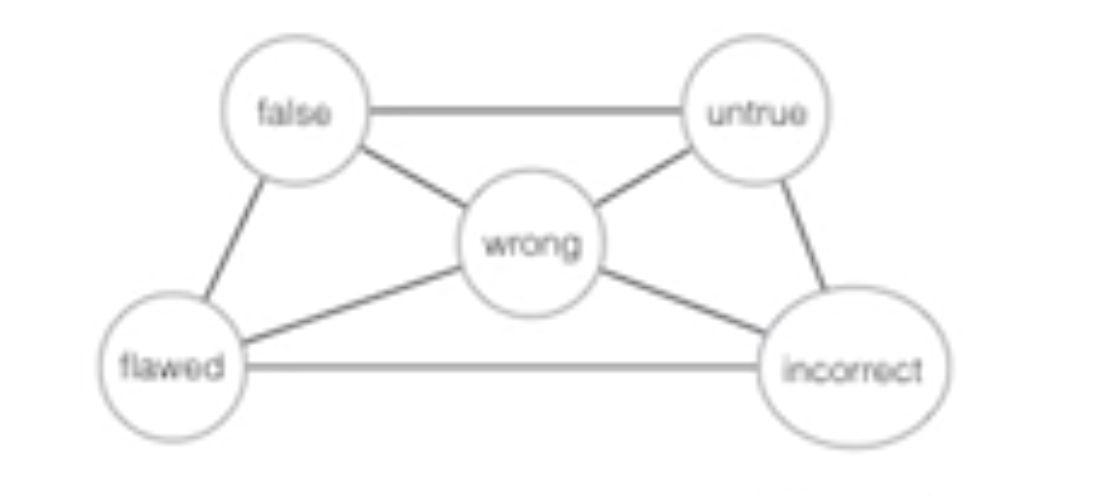









1. Above information is absolutely correct as it is taken from humans.
2. The words can take care of missing words at the time of training.

🔔 Retrofit

Use the existing vectors and improve them

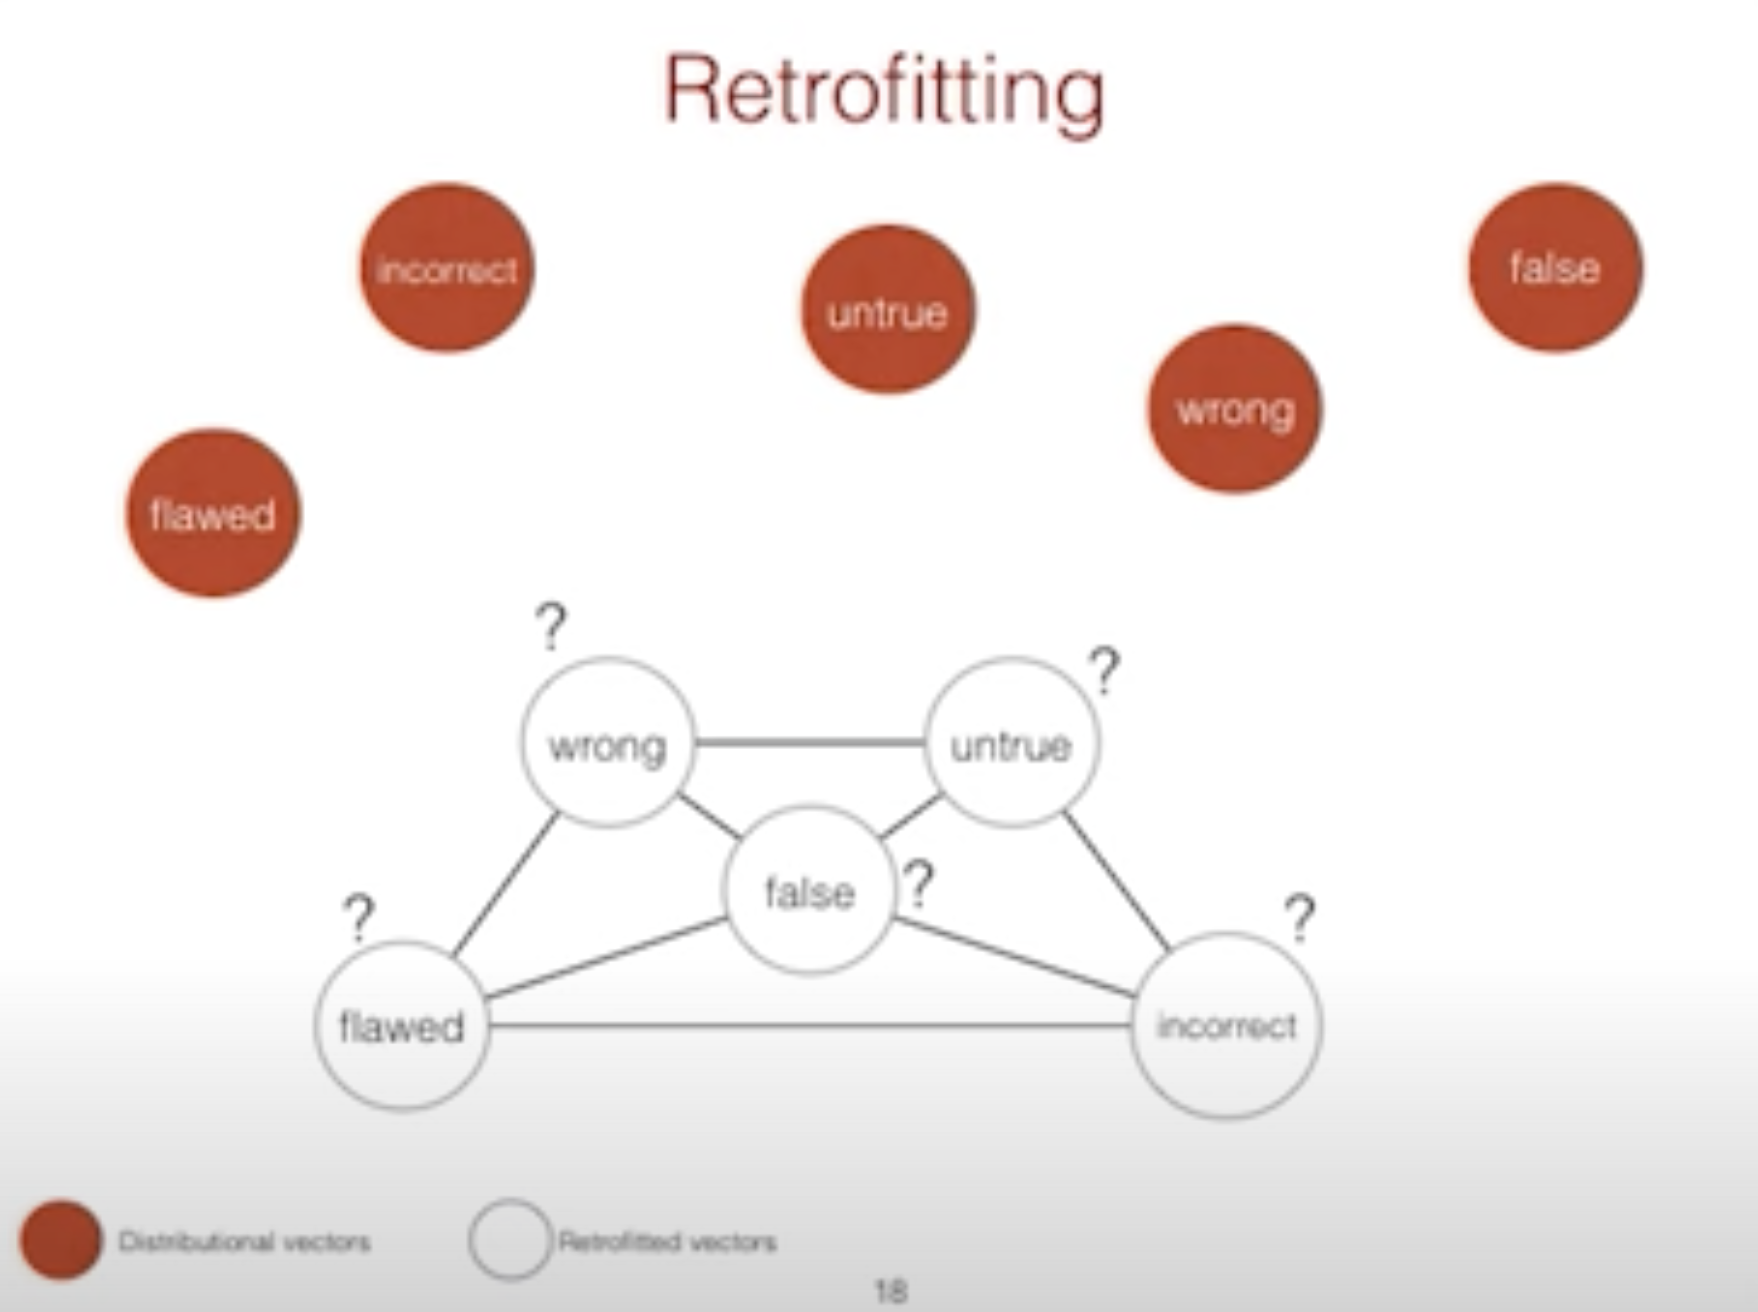

1. Given RED 🏀 nodes are words with vectors coming from distributional information
2. WHITE nodes ⚪ are words with semantic connections but needs to be retrofitted/corrected.

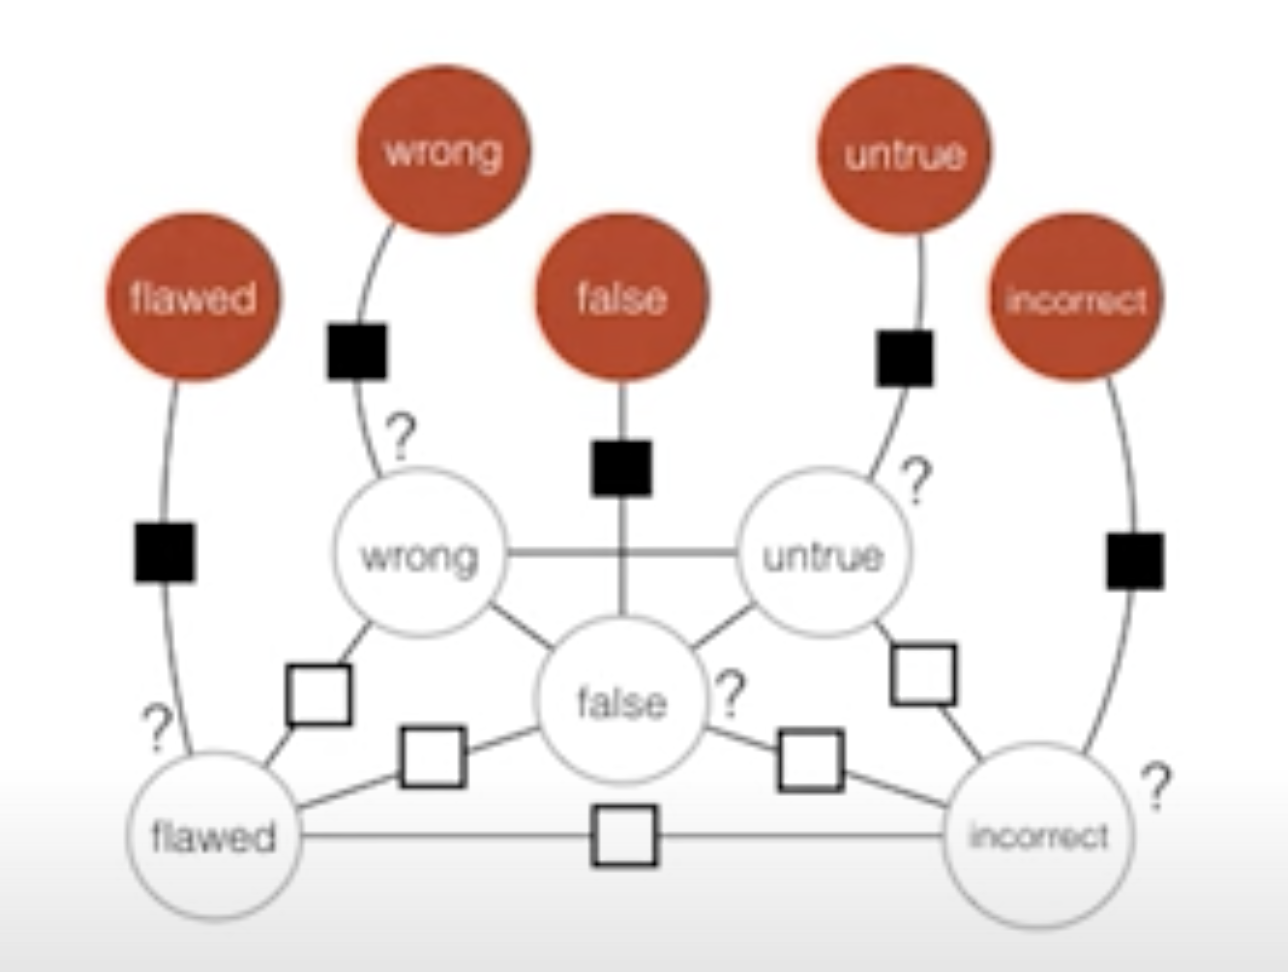

⏰ Edge potentials  

Euclidean distance between words.

Two types

1. Black - From RED to WHITE nodes 
2. White - Within WHITE nodes

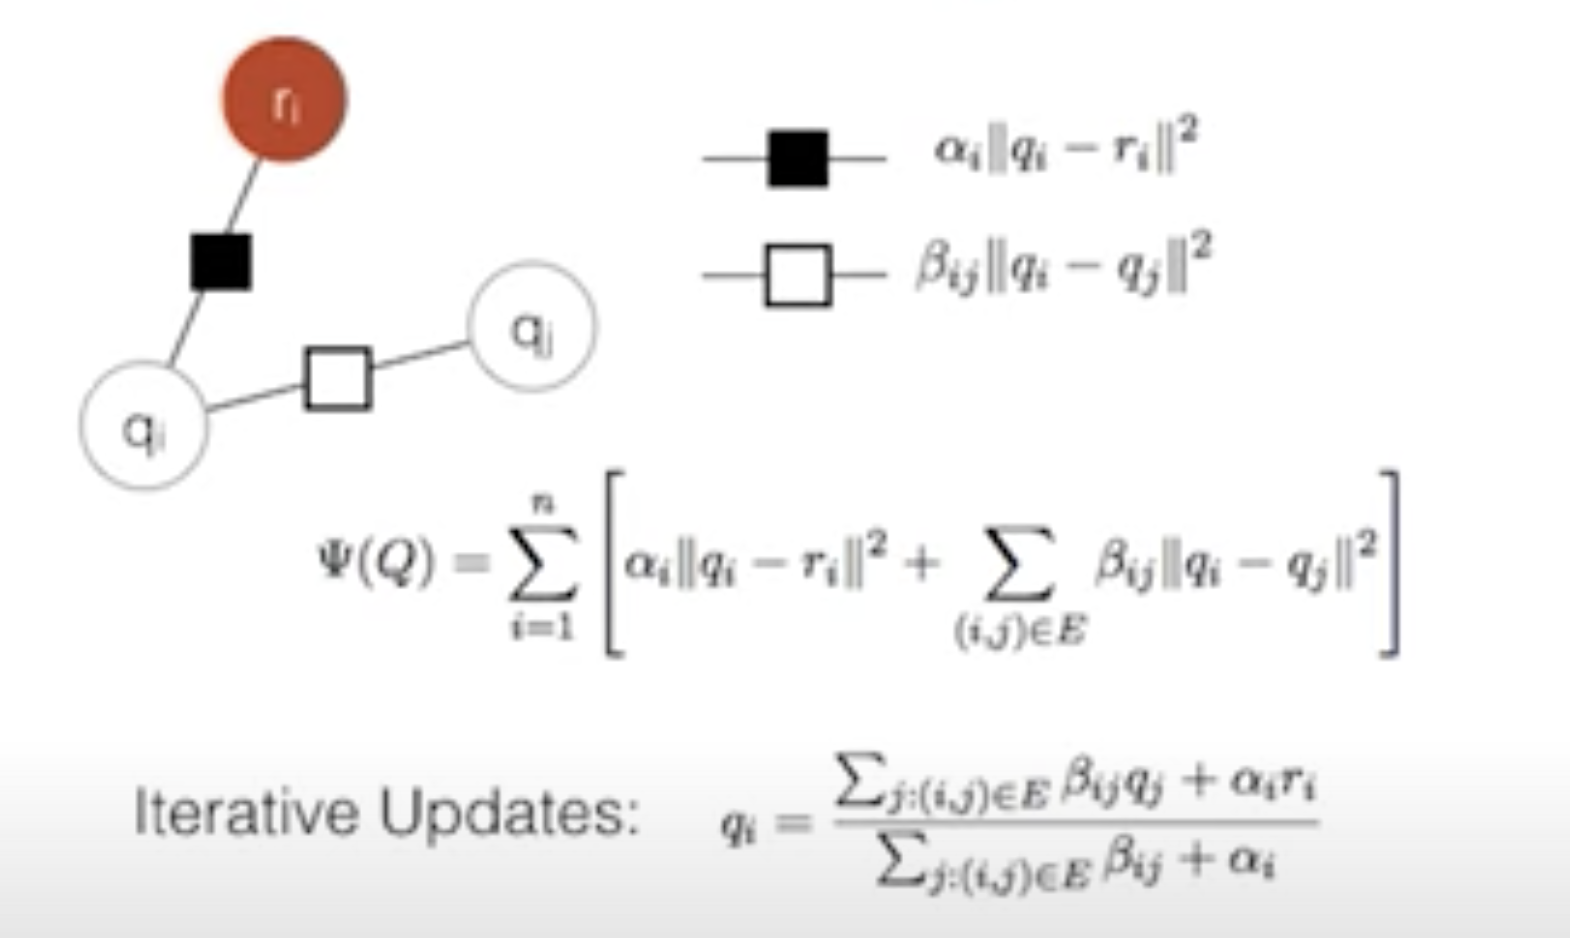

## Cost Function and Minimization method

The authors have deployed 2 hyperparameters α and β 

*   The euclidean distance between white and red is weighted with α   
*   The euclidean distance between white and white is weighted with β

Single cost function over whole graph is taken as sum over all examples 

⏰ Idea

How different is the retrofitted vector is to distributional vector, and
how different is the retrofitted vector to different retrofitted vector.



⛲ To update the cost function, the author has used an efficient iterative updating method (Bengio et al., 2006; Subramanya et al., 2010; Das and Petrov, 2011; Das and Smith, 2011)

# Evaluation done on below tasks

1. Word Similarity - Increase in earlier accuracies to 5% on Glove, Skip gram
2. Semantic analysis - Increase in earlier accuracies to 2%

# Summary

1.   Post processing method
2.   No need to update lexicons or distributional vectors
3.   Not a task specific algo
4.   Application to any vector model



# How to reframe the above algo to any image domain?



*   The distributional vector taken above (RED nodes) can be generated from 
any pre-trained network on ImageNet. The output from the last layers can be used to form a fixed size vector 

*   For lexicon knowledge the Imagenet data can be parsed to create a connected graph as shown below.


**Important NOTE** : 

The images are much more complex than words. They can contain a very high dimension of information which would not be easy to transfer in a lexicon way of association.



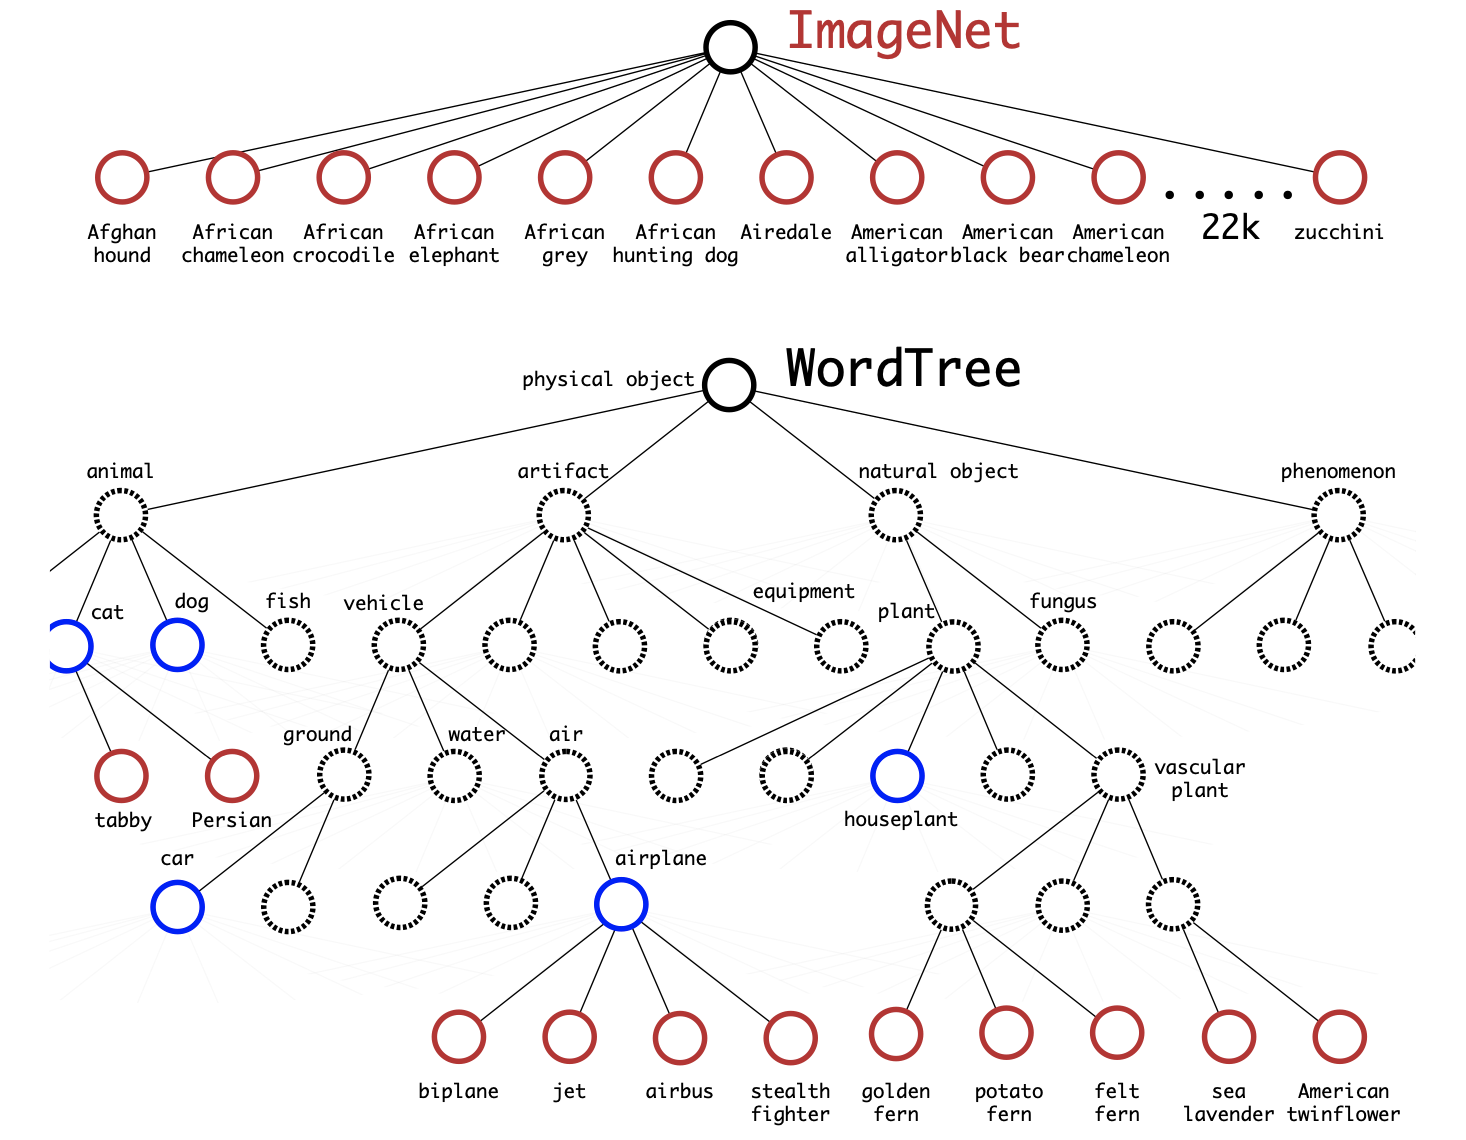

# Implementation

1. To get the word distributional vectors. The sample vectors present in the official paper are taken.

2. To get the lexicons of words the framenet associations are used.

3. 

In [ ]:
!git clone https://github.com/PrinceP/retrofitting.git

fatal: destination path 'retrofitting' already exists and is not an empty directory.


In [ ]:
!cp retrofitting/sample_vec.txt .
!cp -r retrofitting/lexicons .
!ls

lexicons  retrofitting	sample_data  sample_vec.txt


## Format of Input Vector

* Word -> Vector of floats

In [ ]:
!head sample_vec.txt

biennials -0.14307 0.10847 -0.032377 0.091573 -0.029721 0.11704 -0.15579 0.24033 -0.085831 -0.039297 0.025851 -0.014047 0.016754 0.0091426 -0.20261 -0.031946 -0.12119 0.081614 0.0080966 0.15618 -0.3269 0.17114 -0.17094 -0.19134 0.17856 -0.22448 0.2271 -0.10867 0.025868 0.19715 0.2117 -0.22244 0.056319 -0.097754 0.14187 0.085534 -0.038548 0.23494 0.13518 -0.1268 -0.13909 0.27896 0.0025857 -0.17491 -0.063471 0.027577 0.13556 -0.0094128
verplank 0.061966 0.013867 0.097894 0.069291 0.025128 -0.029515 -0.0068756 -0.21864 -0.025601 -0.047496 -0.091767 0.081062 0.11705 0.025643 -0.051421 -0.074378 0.012586 -0.026915 0.19103 -0.15763 0.051448 0.13455 -0.040023 0.2077 0.017204 0.22573 0.083228 -0.0079535 -0.11535 0.17306 0.014453 -0.19401 -0.1076 -0.16378 0.25349 -0.18004 -0.044328 -0.16348 -0.091957 -0.36885 -0.01324 0.0078103 -0.00681 -0.021193 -0.11642 0.23982 -0.23426 0.43564
clottes -0.0089251 -0.061586 0.1221 0.035306 -0.061313 -0.04685 0.11966 0.084184 0.057614 0.16206 0.10281 -0.22645 -

*  Each line contains the associations of different words

In [ ]:
!head lexicons/framenet.txt

source
sprinkle splatter pump drip spray splash spatter squirt
splatter sprinkle pump drip spray splash spatter squirt
pump sprinkle splatter drip spray splash spatter squirt
drip sprinkle splatter pump spray splash spatter squirt
spray sprinkle splatter drip pump splash spatter squirt
splash sprinkle splatter pump drip spray spatter squirt
spatter sprinkle splatter pump drip spray splash squirt
squirt sprinkle splatter pump drip spray splash spatter
run-through rehearse run practice rehearsal mock drill exercise


In [ ]:
import numpy as np


Read the vectors for each word

In [ ]:
word_vec = {}

for line in open('sample_vec.txt'):
  word = line.strip().split()[0]
  vectors = line.strip().split()[1:]
  word_vec[word] = np.array(vectors).astype(np.float)

Read the lexicon similarity graph, framenet is taken; any other lexicon can also be taken.

In [ ]:
lexicon_vec = {}

for line in open('lexicons/framenet.txt'):
  word = line.strip().split()[0]
  vectors = line.strip().split()[1:]
  lexicon_vec[word] = [ w.lower() for w in np.array(vectors).astype(np.str)]

In [ ]:
updated_word_vec = word_vec.copy()
vocab_words = set(updated_word_vec.keys())
final_words_to_be_taken = vocab_words.intersection(set(lexicon_vec.keys()))

In [ ]:
final_words_to_be_taken

{'advancement',
 'affiliated',
 'approving',
 'apron',
 'bellow',
 'chain',
 'clause',
 'concurrency',
 'crowd',
 'crown',
 'defenses',
 'discipline',
 'disparagement',
 'exact',
 'extend',
 'fib',
 'fin',
 'fit',
 'fix',
 'fluster',
 'following',
 'indicative',
 'irk',
 'jerk',
 'litre',
 'master',
 'minute',
 'needed',
 'nettle',
 'neurologist',
 'obese',
 'palazzo',
 'penitence',
 'photoelectric',
 'quarter',
 'quartet',
 'quibble',
 'raped',
 'skirmish',
 'smoulder',
 'snatch',
 'so-so',
 'trivial',
 'two-piece',
 'uplifting',
 'wrong'}

Taking only 10 iterations of converging the word vectors

In [ ]:
for it in range(10):
  for word in final_words_to_be_taken:
    wordNeighbours = set(lexicon_vec[word]).intersection(vocab_words)
    numNeighbours = len(wordNeighbours)

    #no neighbours, pass - use data estimate
    if numNeighbours == 0:
      continue
    # the weight of the data estimate if the number of neighbours
    newVec = numNeighbours * word_vec[word]
    # loop over neighbours and add to new vector (currently with weight 1)
    for ppWord in wordNeighbours:
      newVec += updated_word_vec[ppWord]
    updated_word_vec[word] = newVec/(2*numNeighbours)

In [ ]:
# updated_word_vec

In [ ]:
# word_vec

In [ ]:
#Saves the file with total lines and dimensions

def print_word_vecs(wordVectors, outFileName):
  outFile = open(outFileName, 'w')
  num_lines = len(wordVectors)
  num_dims = len(wordVectors['grossmann'])
  outFile.write(str(num_lines)+' '+str(num_dims))  
  outFile.write('\n')

  for word, values in wordVectors.items():
    outFile.write(word+' ')
    for val in wordVectors[word]:
      outFile.write('%.4f' %(val)+' ')
    outFile.write('\n')      
  outFile.close()

In [ ]:
print_word_vecs(updated_word_vec, "updated_sample_vec.txt")
print_word_vecs(word_vec, "original_sample_vec.txt")


In [ ]:

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import gensim
%matplotlib inline

In [ ]:
# Method to plot the top no_similar_words in 2D using TSNE
def display_closestwords_tsnescatterplot(model, word, word_vector_dimension, no_similar_words, plot_title):
    
    arr = np.empty((0,word_vector_dimension), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word, topn=no_similar_words)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.xticks(rotation=35)
    plt.title(plot_title)
    plt.show()

In [ ]:
!pip install gensim

In [ ]:

original_sample = gensim.models.KeyedVectors.load_word2vec_format('original_sample_vec.txt', binary=False, encoding='utf-8', unicode_errors='ignore')
retrofitted_sample = gensim.models.KeyedVectors.load_word2vec_format('updated_sample_vec.txt', binary=False)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


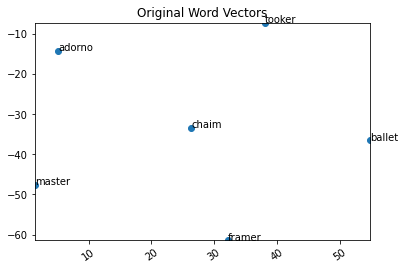

In [ ]:

# display the words closest using the original vectors
display_closestwords_tsnescatterplot(original_sample, 'master', 48, 5, "Original Word Vectors")

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


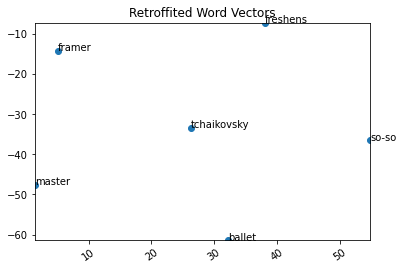

In [ ]:

# display the words closest using the vectors retrofitted with the framenet lexicons
display_closestwords_tsnescatterplot(retrofitted_sample, 'master', 48, 5, "Retroffited Word Vectors")

# Summary

The above representation shows before and after running the retrofitting.

The input word "master" is taken and plotted with nearest 5 neighbours.
